# Modelo de classificação simpels - Functional AP

Neste exemplo vamos realizar a classificação de imagens com o módulo Functional API do tf2

O Functional API permete criar modelos com mais flexibilidade que o módulo Sequential. Como topologias não lineares, pesos compartilhados, por exemplo, possibilitando criar Redes Siamesas, GANs, dentre outros

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

Neste exemplo vamos utilizar o dataset Fashion Mnist, um dataset de peça de roupas que herda parte do nome do clássifo Mnist de números escritos a mão.

O dataset está disponível nas bibliotecas do tensorflow, já no formato de dataset do TF

In [0]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [0]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

O dataset possui 60 mil exemplos de treino e 10 mil exemplos de teste divididos em 10 classes. As classes estão já representadas numericamente, e cada label representa:

* 0	Camisetas/Top (T-shirt/top)
* 1	Calça (Trouser)
* 2	Suéter (Pullover)
* 3	Vestidos (Dress)
* 4	Casaco (Coat)
* 5	Sandálias (Sandal)
* 6	Camisas (Shirt)
* 7	Tênis (Sneaker)
* 8	Bolsa (Bag)
* 9	Botas (Ankle boot)


In [0]:
#Função auxiliar para plotar imagem

def plot_img(img):
  plt.figure()
  plt.imshow(img, cmap=plt.cm.binary)
  plt.colorbar()
  plt.grid(False)
  plt.show()

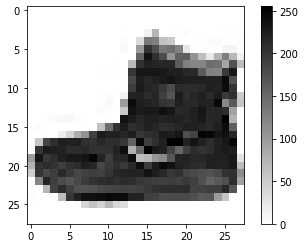

In [9]:
plot_img(train_images[0])

Um passo importante para um treinamento estável é normalizar os daos para que tenham o valores entre 0 e 1. Como nas imagens do nosso dataset os pixels possuem valor de 0 a 255, basta dividir tudo por 255

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Criando e salvando um modelo

No módulo *Sequential*, a rede é criada a partir de uma lista de *layers* colocadas em sequência.

No Funcional API, cada *layer* é criada individualmente, e elas recebem como entrada saídas de outras *layers*. Isso proporciona mais maleabilidade, podendo uma saída ser entrada de duas camadas, propciando a criação de Redes Siamesas e Skip Conection

In [0]:
def create_model(layers):
  x_in = tf.keras.Input(shape=(28, 28))
  x = tf.keras.layers.Flatten()(x_in)
  
  for i, layer_size in enumerate(layers):
    x = tf.keras.layers.Dense(layer_size, activation='relu')(x)
  
  output = tf.keras.layers.Dense(10, activation='softmax')(x)
  
  model = tf.keras.Model(inputs=x_in, outputs=output)
  model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer='adam',
                metrics=['accuracy'])
  return model

In [0]:
my_model = create_model([128, 128])

In [17]:
my_model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [18]:
my_model.fit(x=train_images, y=train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4806 - accuracy: 0.8273
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3610 - accuracy: 0.8672
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3280 - accuracy: 0.8777
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3049 - accuracy: 0.8853
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2864 - accuracy: 0.8935


Teste do modelo

In [19]:
my_model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 1ms/step - loss: 0.3496 - accuracy: 0.8782


[0.34964150190353394, 0.8781999945640564]

In [20]:
img = test_images[0]
img = (np.expand_dims(img,0))
class_names[test_labels[0]]

'Ankle boot'

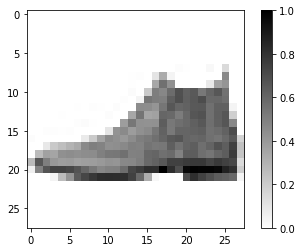

In [0]:
plot_img(test_images[0])

In [21]:
preds = my_model.predict(img)
preds

array([[2.83658125e-07, 1.13725356e-07, 7.05855996e-08, 3.37629196e-08,
        1.30173177e-07, 1.67762209e-03, 1.13686372e-06, 7.36160297e-03,
        1.82294116e-07, 9.90958810e-01]], dtype=float32)

Salvando o modelo treinado

In [0]:
my_model.save('fasion_mnist.h5')

In [0]:
loaded_models = tf.keras.models.load_model('fasion_mnist.h5')

In [24]:
loaded_models.predict(img)

array([[2.83658125e-07, 1.13725356e-07, 7.05855996e-08, 3.37629196e-08,
        1.30173177e-07, 1.67762209e-03, 1.13686372e-06, 7.36160297e-03,
        1.82294116e-07, 9.90958810e-01]], dtype=float32)